<a href="https://colab.research.google.com/github/rks16/My_project/blob/main/Project_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction

Problem Statement : To predict if a person has heart disease or not based on few features

Column Descriptions:

1. id (Unique id for each patient)

2. age (Age of the patient in years)

3. origin (place of study)

4. sex (Male/Female)

5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

7. chol (serum cholesterol in mg/dl)

8. fbs (if fasting blood sugar > 120 mg/dl)

9. restecg (resting electrocardiographic results)
  
  -- Values: [normal, stt abnormality, lv hypertrophy]

10. thalach: maximum heart rate achieved

11. exang: exercise-induced angina (True/ False)

12. oldpeak: ST depression induced by exercise relative to rest

13. slope: the slope of the peak exercise ST segment

14. ca: number of major vessels (0-3) colored by fluoroscopy

15. thal: [normal; fixed defect; reversible defect]

15. num: the predicted attribute




In [90]:
#importing Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
 from sklearn.tree import DecisionTreeClassifier


IndentationError: ignored

# Data Collection and Processing


In [4]:
#loading data 'Heart_disease_data' to a pandas Dataframe
data = pd.read_csv("/content/heart_disease_data.csv")

In [41]:
#Preview
data.head() #first 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
#Preview
data.tail() #last 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Here 1 represents the person has some kind of heart disease and 0 represents does not have any heart disease

In [7]:
#Checking for null values in the dataset
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#checking total number of data
data.shape # output implies ( rows,columns )

(303, 14)

In [10]:
#Getting information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# Analyzing different statistical parameters in the dataset

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
# Analyzing the number of people with heart diesease
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --> Diseased

0 --> Normal

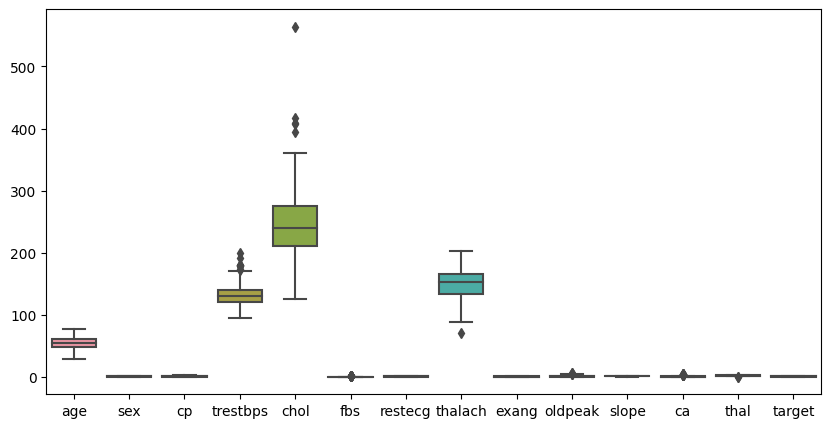

In [15]:
# Visualizing different parameters

plt.figure(figsize=(10, 5))
sns.boxplot(data)
plt.show()

<Axes: xlabel='target', ylabel='count'>

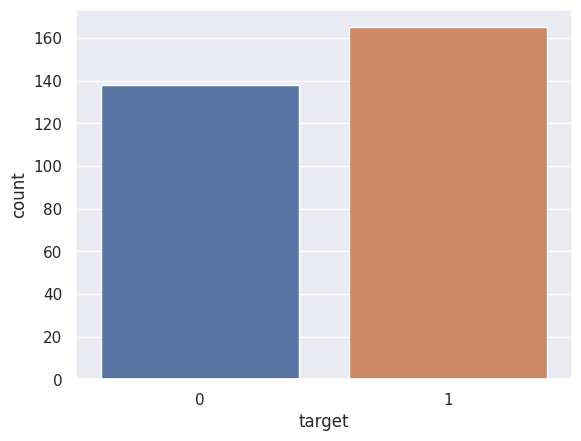

In [22]:
sns.set_theme()
sns.countplot(data= data, x="target")

<ipython-input-38-bcfe6470173f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["chol"], )


<Axes: xlabel='chol', ylabel='Density'>

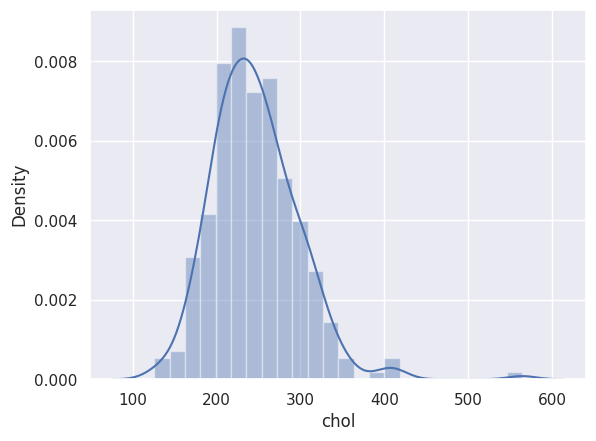

In [38]:
# Analysing the distribution of "chol" in the dataset
sns.distplot(data["chol"] )

<ipython-input-40-8633955a410c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["oldpeak"] )


<Axes: xlabel='oldpeak', ylabel='Density'>

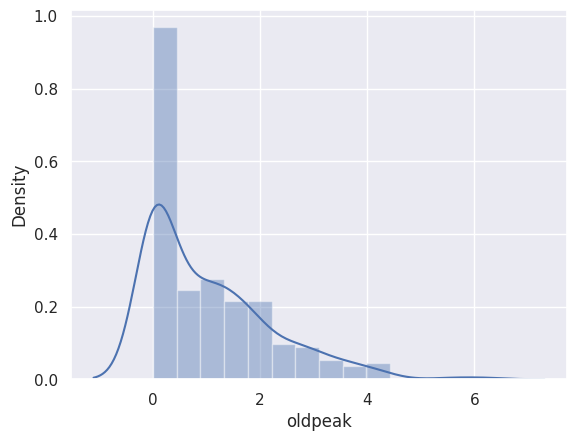

In [40]:
# Analysing the distribution of "oldpeak" in the dataset
sns.distplot(data["oldpeak"] )

<ipython-input-39-e370b03ec090>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["thalach"] )


<Axes: xlabel='thalach', ylabel='Density'>

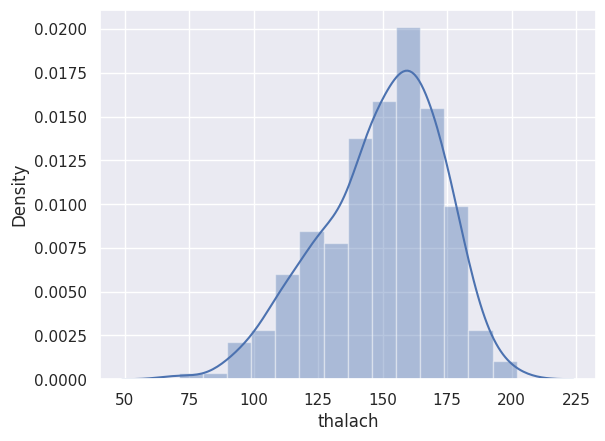

In [39]:
# Analysing the distribution of "thalach" in the dataset
sns.distplot(data["thalach"] )

<ipython-input-37-ad6552d9d7ef>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["trestbps"], )


<Axes: xlabel='trestbps', ylabel='Density'>

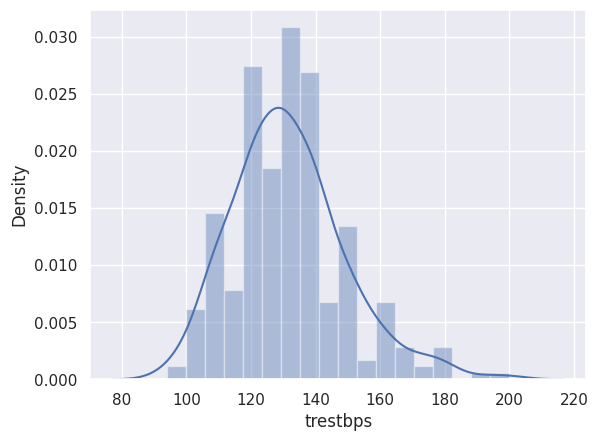

In [37]:
# Analysing the distribution of "trestbps" in the dataset
sns.distplot(data["trestbps"])

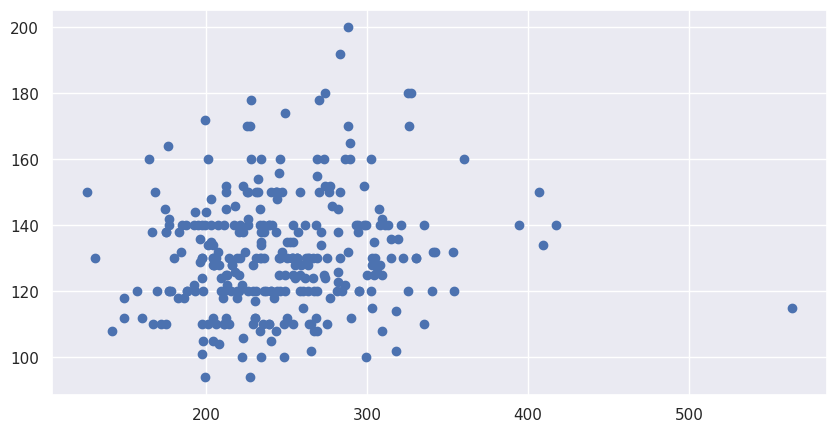

In [48]:
plt.figure(figsize=(10,5))
plt.scatter(data=data ,y= "trestbps",x="chol")

<Axes: xlabel='trestbps', ylabel='thalach'>

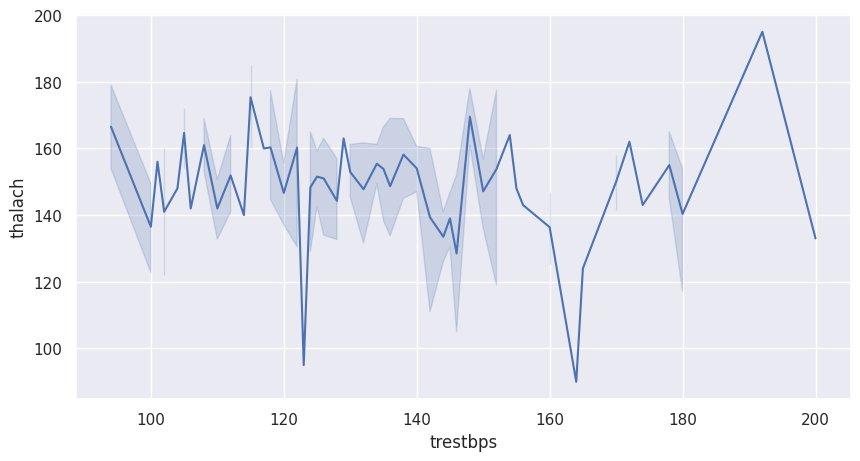

In [60]:
plt.figure(figsize=(10,5)) #data=data
sns.lineplot(data=data,x= "trestbps",y="thalach")


<Axes: >

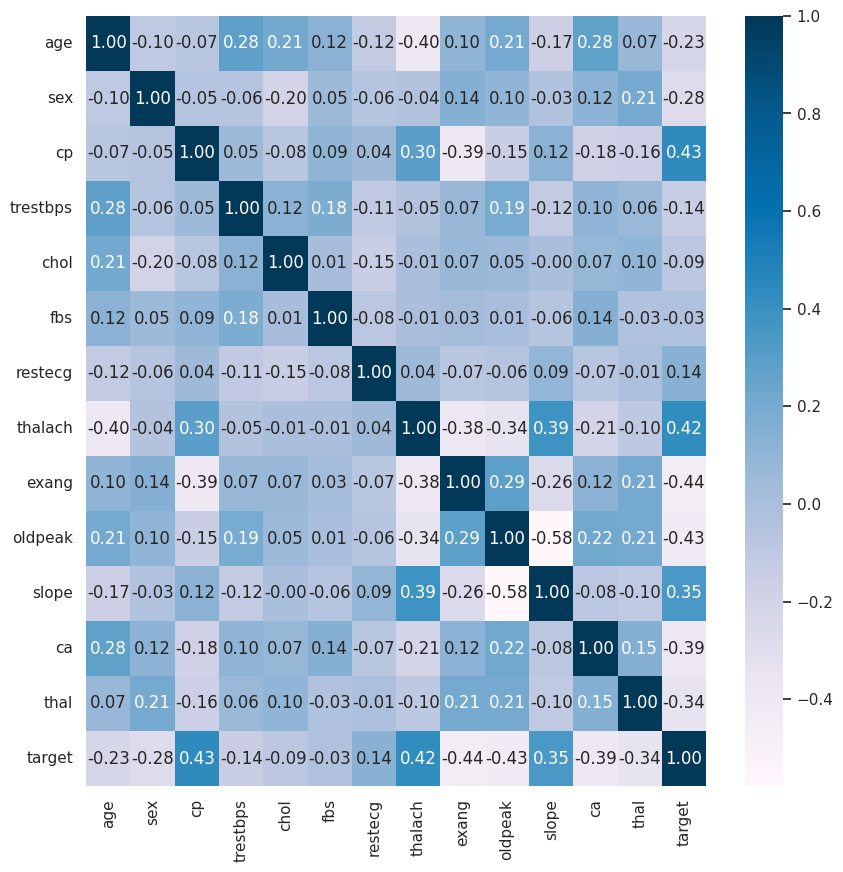

In [35]:
cor_d = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor_d, cmap="PuBu", annot=True, fmt=".2f", cbar=True)

# Splitting data into Features and Labels

In [62]:
X = data.drop(columns="target", axis=1)
Y = data["target"]

In [65]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [66]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


# Splitting data into trainning and test data

In [69]:
#Splitting data

X_train,X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

We stratify the column Y ie target dat because, if we dont then there are chances that the trainng data may get more of good data and fails during predictions

In [70]:
# Analyzing the number of data points in each varible

print("Shape of trainng data is : ", X_train.shape, "\nShape of test data is : ",X_test.shape)

Shape of trainng data is :  (242, 13) 
Shape of test data is :  (61, 13)


# Model Trainning

# 1. Logistic Regression

In [73]:
#Using Logistic Regression

model_lr = LogisticRegression()

model_lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Training dataset

In [76]:
# Evaluating model

# train dataset
X_trn_p = model_lr.predict(X_train)

acc1 = accuracy_score(X_trn_p, y_train)

In [77]:
print("Accuracy of the data : ", acc1)

Accuracy of the data :  0.8512396694214877


## Testing Dataset

In [78]:
# Evaluating model

# test dataset
X_tst_p = model_lr.predict(X_test)

acc1_tst = accuracy_score(X_tst_p, y_test)

In [79]:
print("Accuracy of the data : ", acc1_tst)

Accuracy of the data :  0.819672131147541


# 2. SVM

In [81]:
model_svm = svm.SVC()

model_svm.fit(X_train,y_train)

SVC()

## Training dataset

In [84]:
# Evaluating model

# train dataset
X_trn_p = model_svm.predict(X_train)

acc2 = accuracy_score(X_trn_p, y_train)

In [85]:
print("Accuracy of the data : ", acc2)

Accuracy of the data :  0.6942148760330579


In [93]:
# Evaluating model

# test dataset
X_tst_p = model_svm.predict(X_test)

acc1_tst = accuracy_score(X_tst_p, y_test)

In [94]:
print("Accuracy of the data : ", acc1_tst)

Accuracy of the data :  0.6229508196721312


## 3. Decesion Tree Classifier

In [95]:
model_dtc= DecisionTreeClassifier(random_state=0)

model_dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

## Trainning data

In [96]:
# Evaluating model

# train dataset
X_trn_p = model_dtc.predict(X_train)

acc3 = accuracy_score(X_trn_p, y_train)

In [97]:
print("Accuracy of the data : ", acc3)

Accuracy of the data :  1.0


## Testing Data

In [99]:
# Evaluating model

# train dataset
X_tst_p = model_dtc.predict(X_test)

acc3 = accuracy_score(X_tst_p, y_test)

In [100]:
print("Accuracy of the data : ", acc3)

Accuracy of the data :  0.7377049180327869


From the above we can conclude that Logistic Regression is the best suitable model to the project and hence we select it



---



---



# Predicting Heart Disease

In [105]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_lr.predict(input_data_reshaped)
print(prediction,"\n")

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease \n')
else:
  print('The Person has Heart Disease \n')

[0] 

The Person does not have a Heart Disease 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [110]:
input_data = (37,1,2,130,250,0,1,187,0,3.5,0,0,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_lr.predict(input_data_reshaped)
print(prediction,"\n")

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease \n')
else:
  print('The Person has Heart Disease \n')

[1] 

The Person has Heart Disease 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
